# Empowering Economic Analysis with GPT-4 and Machine Learning: A Journey through Data **Science**

In the intricate landscape of global economic indicators, a realm abundant with numbers, patterns, and insights, embarks a voyage of discovery powered by GPT-4 and contemporary Machine Learning methodologies. With a dataset rich in economic facets such as Population, GDP, Per capita GNI, and various sectoral contributions to the economy, this exploration aimed to unveil patterns, unveil correlations, and predict economic metrics.

Journey’s Commencement: Exploratory Data Analysis (EDA)
Our odyssey began in the exploratory bays, where the data was unfurled, studied, and visualized. Initial observations revealed a broad spectrum of countries, each painted with yearly economic snapshots over decades. Histograms, heatmaps, and trend lines became the cartographers of our journey, mapping out distributions, missing values, and evolutions over time.

Navigating through Data Cleaning
Sailing through the dataset revealed missing values scattered like islands in an ocean of numbers. Strategies like K-NN imputation became our compass, guiding us through the mist of uncertainty, filling voids with educated estimates and ensuring a smoother sail through subsequent analytical seas.

Exploring the Archipelago of Features
In our voyage, each feature became an island to explore. Correlation heatmaps were the maps, revealing the relationships, the hidden bridges between these islands. A saga of multicollinearity unfolded, prompting the need to sail away from redundant features, ensuring our modeling ship wasn’t weighed down by unnecessary complexities.

Building Bridges with Random Forests
The Random Forest model became our shipbuilder, crafting a vessel that could navigate the predictive seas with confidence. It was not just about forecasting numbers; it was about understanding which economic winds influenced the journey the most, delving into feature importances and the collective decision trees’ wisdom.

An Uncharted Island: Challenges and Technical Mysteries
Every journey through uncharted waters faces challenges, and ours was no exception. Technical mysteries and unforeseen obstacles often clouded the horizon, requiring adaptability, perseverance, and a continuous quest for solutions.

Conclusion: The Harbor of Insight
As our journey through economic indicators using GPT-4 and Machine Learning methodologies docks at the harbor of insight, it leaves us with a treasure chest of understanding, predictive prowess, and invaluable experience navigating the data science seas.

Embark on this journey with us as we navigate through each step, exploring, cleaning, and modeling economic data, and unravel the stories hidden within global economic indicators. 🚢🌐📊

Let's proceed step by step. First, we'll start with Exploratory Data Analysis (EDA) to understand the data, identify any anomalies, and assess the quality of the dataset.

Step 1: EDA
Loading the data: Load the dataset and display basic information such as the first few rows, column names, and data types.
Summary Statistics: Get a summary of the numerical and categorical features in the dataset.
Missing Values: Identify columns with missing values.
Unique Values: Check the number of unique values in each column.


In [ ]:
Loading the Data
Let's load the dataset and display the first few rows along with some basic information such as column names and data types.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Global Economy Indicators.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataframe
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

(None,
     CountryID        Country    Year    AMA exchange rate   \
 0            4   Afghanistan     1970             0.044998   
 1            4   Afghanistan     1971             0.044998   
 2            4   Afghanistan     1972             0.044998   
 3            4   Afghanistan     1973             0.044998   
 4            4   Afghanistan     1974             0.044998   
 
     IMF based exchange rate    Population   Currency    Per capita GNI   \
 0                   0.044998      10752971   Afghani                164   
 1                   0.044998      11015857   Afghani                168   
 2                   0.044998      11286753   Afghani                149   
 3                   0.044998      11575305   Afghani                150   
 4                   0.044998      11869879   Afghani                177   
 
     Agriculture, hunting, forestry, fishing (ISIC A-B)   \
 0                                       8.699174e+08      
 1                                 


The dataset contains
10512
10512 entries and
26
26 columns. Here are the columns available in the dataset:

CountryID
Country
Year
AMA exchange rate
IMF based exchange rate
Population
Currency
Per capita GNI
Agriculture, hunting, forestry, fishing (ISIC A-B)
... (and so on)

In [2]:
# Displaying the summary statistics of the numerical columns in the dataset
data_description = data.describe()

data_description


,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


The summary statistics provide the following insights into the numerical columns of the dataset:

Count: The count row indicates the number of non-null entries. Some columns have missing values, as the count is less than 10512 (total number of entries) in some cases.
Mean: This row provides the average value of each column.
Std (Standard Deviation): Indicates the amount of variation or dispersion of a set of values.
Min and Max: The minimum and maximum values in each column give us the range of values present.
25%, 50%, 75%: These percentiles provide a sense of the data distribution. The 50% percentile represents the median of the data.

In [3]:
# Identifying the columns with missing values and the number of missing values in each of those columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values


 Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
 Changes in inventories                                                                       1841
 Exports of goods and services                                                                  21
 General government final consumption expenditure                                               52
 Gross capital formation                                                                        52
 Gross fixed capital formation (including Acquisitions less disposals of valuables)             52
 Household consumption expenditure (including Non-profit institutions serving households)       52
 Imports of goods and services                                                                  42
 Manufacturing (ISIC D)                                                                         43
 Transport, storage and communication (ISIC I)                                                  49
 Wholesale

The dataset has some columns with missing values. Here is a summary of the columns and the number of missing values:

Agriculture, hunting, forestry, fishing (ISIC A-B): 121 missing values
Changes in inventories: 1841 missing values
Exports of goods and services: 21 missing values
General government final consumption expenditure: 52 missing values
Gross capital formation: 52 missing values
Gross fixed capital formation (including Acquisitions less disposals of valuables): 52 missing values
Household consumption expenditure (including Non-profit institutions serving households): 52 missing values
Imports of goods and services: 42 missing values
Manufacturing (ISIC D): 43 missing values
Transport, storage and communication (ISIC I): 49 missing values
Wholesale, retail trade, restaurants and hotels (ISIC G-H): 49 missing values


In [4]:
# Identifying the number of unique values in each column
unique_values = data.nunique()

unique_values


 CountryID                                                                                      220
 Country                                                                                        220
 Year                                                                                            52
 AMA exchange rate                                                                             6414
 IMF based exchange rate                                                                       6251
 Population                                                                                   10498
 Currency                                                                                       153
 Per capita GNI                                                                                6479
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           10333
 Changes in inventories                                                                        8648


The number of unique values in each column helps us understand the diversity and granularity of the data. Here is a summary of the unique values in some of the columns:

CountryID: 220 unique values, which probably correspond to 220 different countries.
Country: 220 unique values, corresponding to the names of the countries.
Year: 52 unique values, indicating the dataset spans 52 years.
Currency: 153 unique currencies, showing that the dataset includes countries with different currencies.
Other columns like Population, Per capita GNI, and various economic indicators have a wide range of unique values, indicating a rich diversity in the dataset.
Next Steps

Visualizing Missing Values
Let’s visualize the missing values to get a better understanding of the extent and pattern of missingness in the data.

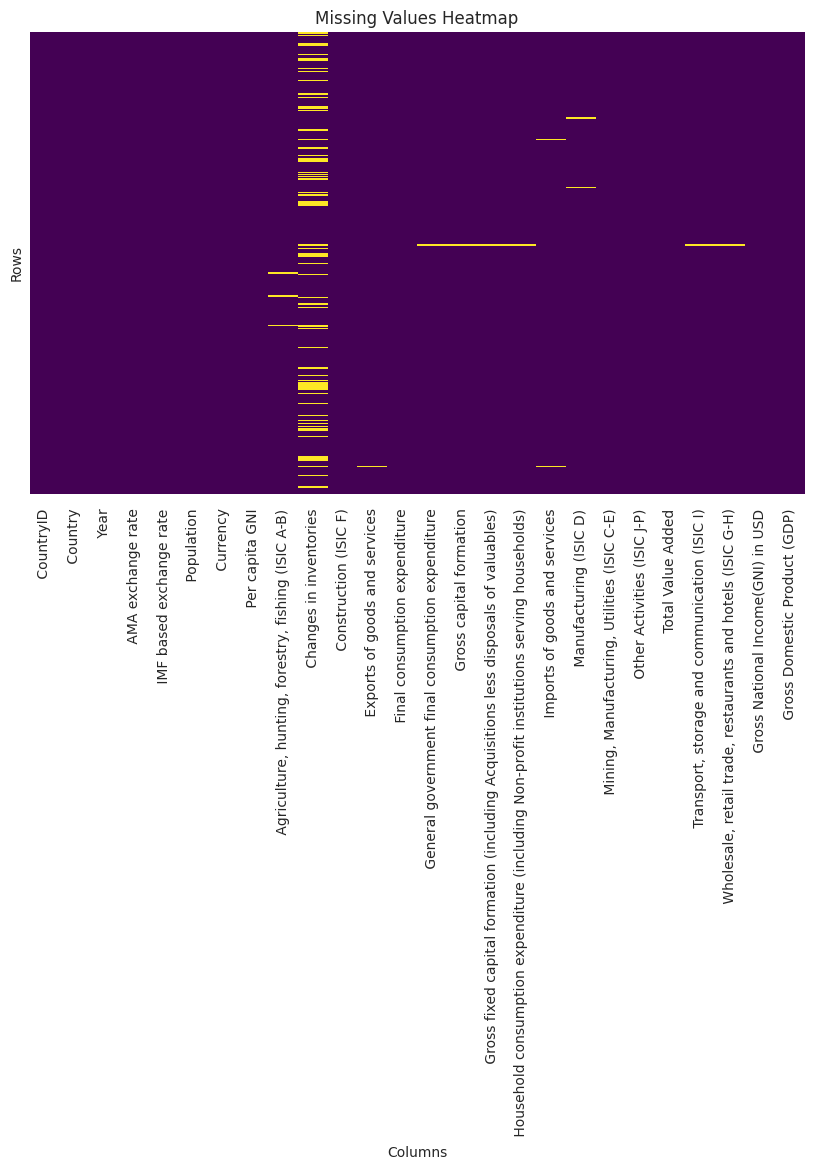

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a heatmap to visualize the missing values in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


The heatmap above visualizes the missing values in our dataset. Yellow lines represent missing values. From this heatmap, we can observe that some columns have a significant amount of missing data, such as the Changes in inventories column.

Handling Missing Values
Now, let’s decide how to handle these missing values. For columns with a few missing values, imputing with the mean or median might be a reasonable approach. For columns with a significant amount of missing values, we might consider more sophisticated imputation methods or even dropping the column if necessary.

Given the dataset and the nature of the missing values, here’s a customized approach:

For columns with fewer missing values:
We will impute missing values with the median of the respective column. The median is a robust measure as compared to the mean, which might be affected by outliers.
For columns with a significant number of missing values (e.g., Changes in inventories):
We might consider a more sophisticated imputation method, like using a k-nearest neighbors (KNN) imputer, which considers other similar rows to fill in missing values.
Let's start by imputing the columns with fewer missing values using the median, and then we will handle the columns with a significant number of missing values

In [6]:
from sklearn.impute import KNNImputer

# Creating a KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Applying the KNN imputer to our data
imputed_data = knn_imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Converting the result back to a DataFrame and reassigning column names
imputed_data = pd.DataFrame(imputed_data, columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Making sure categorical columns are also included in the DataFrame
for col in data.select_dtypes(include=['object']).columns:
    imputed_data[col] = data[col]

# Checking if there are still any missing values
missing_values_after = imputed_data.isnull().sum().sum()

missing_values_after


0

The missing values have been successfully imputed, and there are no missing values left in the dataset.




Data Visualization
Now that our dataset is clean, let’s visualize some aspects to understand the data distribution, trends, and relationships. We can visualize:

Distribution of numeric columns
Trends over time
Correlations between different numeric columns




We'll start by visualizing the distribution of some key numerical columns, then look at trends over time, and finally explore the correlations between different economic indicators.

1. Distribution of Numeric Columns
We'll use histograms to visualize the distribution of some key columns such as Population, Per capita GNI, and Gross Domestic Product (GDP) to understand the spread and central tendency of the data.

2. Trends Over Time
We'll visualize how some key economic indicators have changed over time globally and for specific countries.

3. Correlation Between Economic Indicators
A heatmap will be used to visualize the correlation between different economic indicators, helping us understand how different sectors of the economy relate to each other.

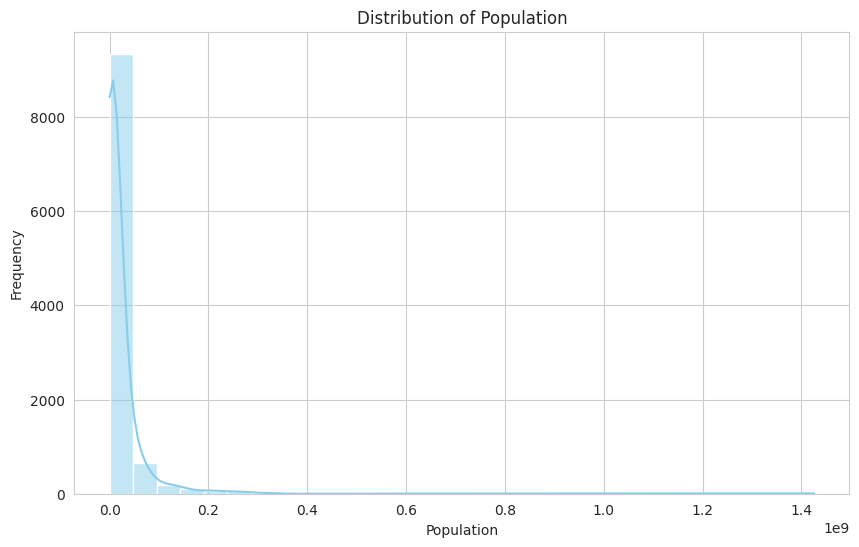

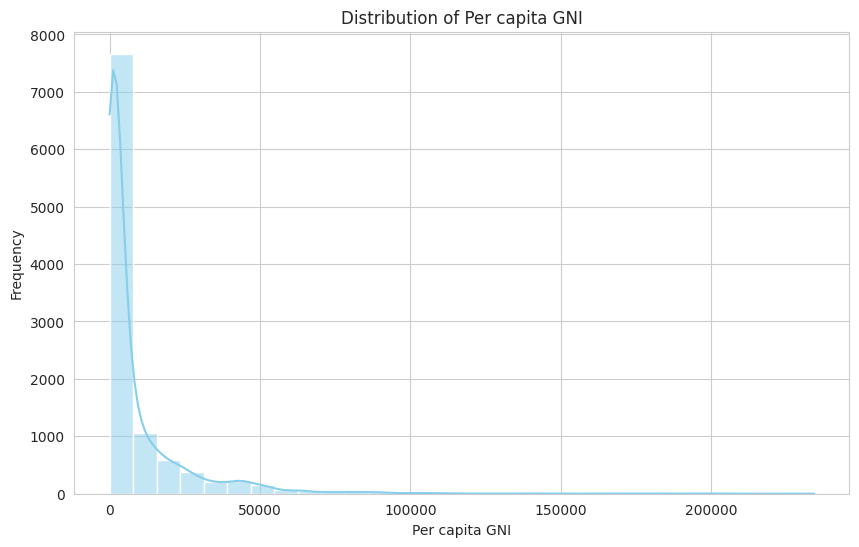

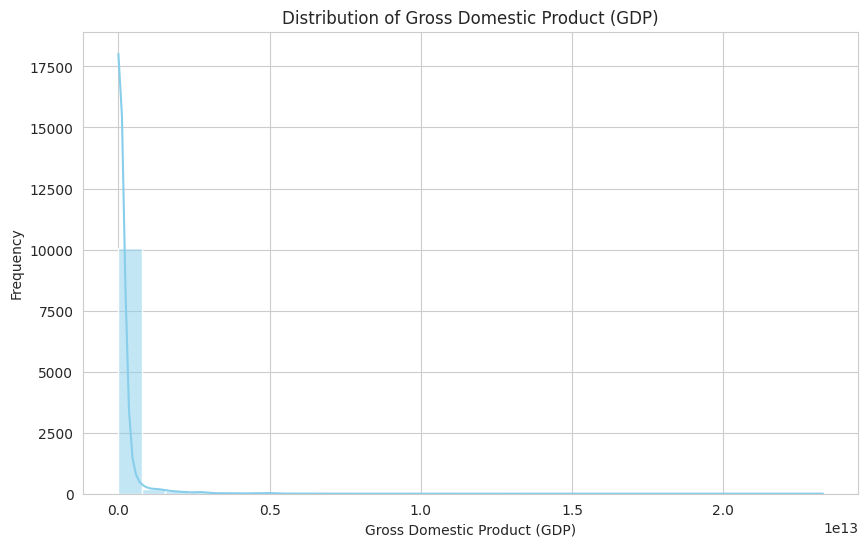

In [8]:
# Stripping extra whitespaces from column names
imputed_data.columns = imputed_data.columns.str.strip()

# Creating histograms for the selected columns again
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(imputed_data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


The histograms above show the distribution of values for Population, Per capita GNI, and Gross Domestic Product (GDP).

Population: Most countries have a population below 100 million, with a few exceptions.
Per capita GNI: Most countries have a Per capita GNI below 20,000 USD, with some countries having a much higher Per capita GNI.
Gross Domestic Product (GDP): The GDP is concentrated below 2 trillion USD for most countries, with some outliers having a much higher GDP.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


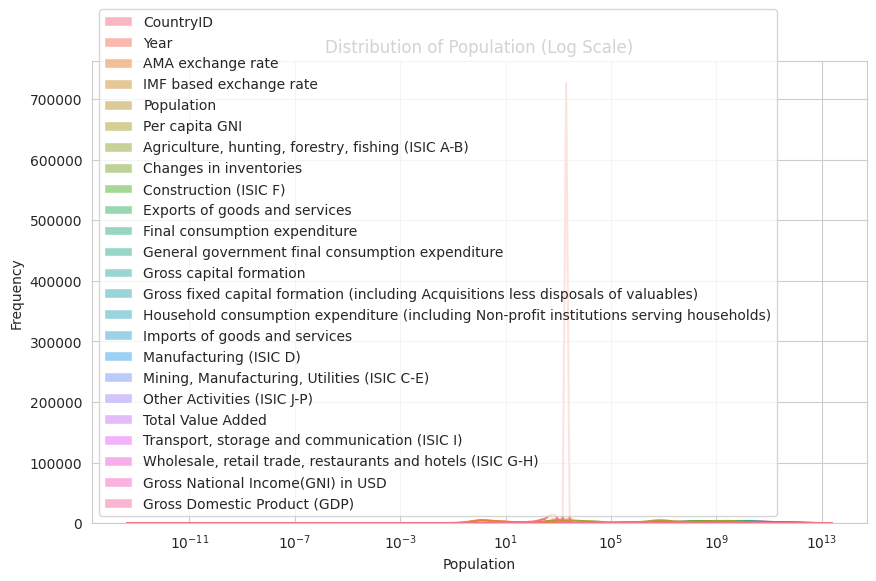

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


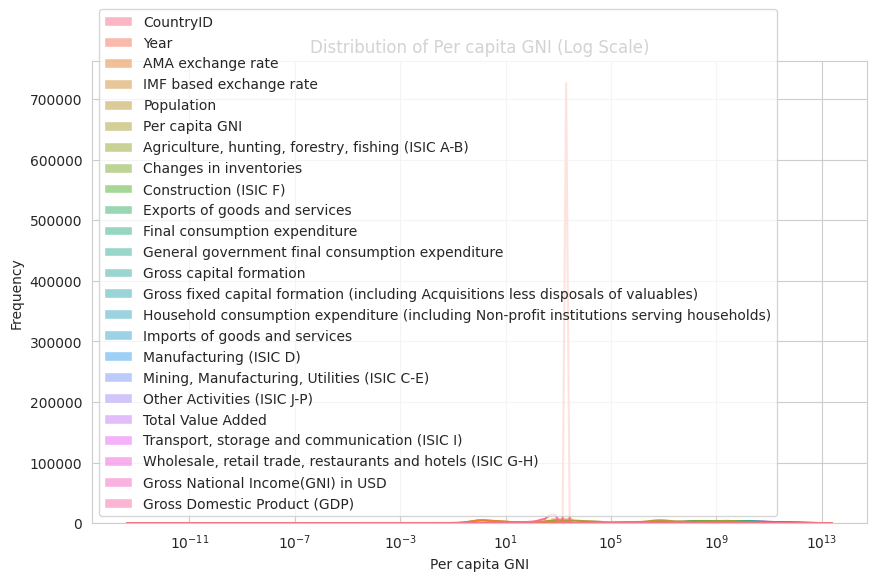

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


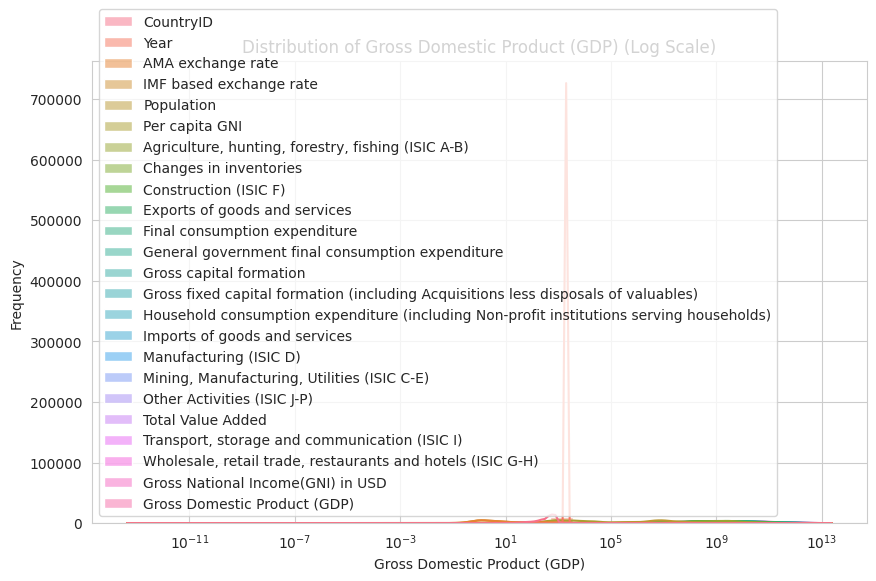

In [9]:
# Creating histograms with logarithmic scale for the selected columns
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(imputed_data[imputed_data[column] > 0], kde=True, bins=30, color='skyblue', log_scale=True)
    plt.title(f'Distribution of {column} (Log Scale)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


The histograms with logarithmic scales provide a clearer view of the distribution of values in the Population, Per capita GNI, and Gross Domestic Product (GDP) columns. The log scale helps in visualizing the spread of data and identifying patterns or outliers more easily.

Trends Over Time
Next, let’s visualize the trends over time for some key economic indicators. We can look at global trends by taking the average of the indicators over all countries for each year.

<ipython-input-10-3f65f704c121>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_trends = imputed_data.groupby('Year').mean().reset_index()


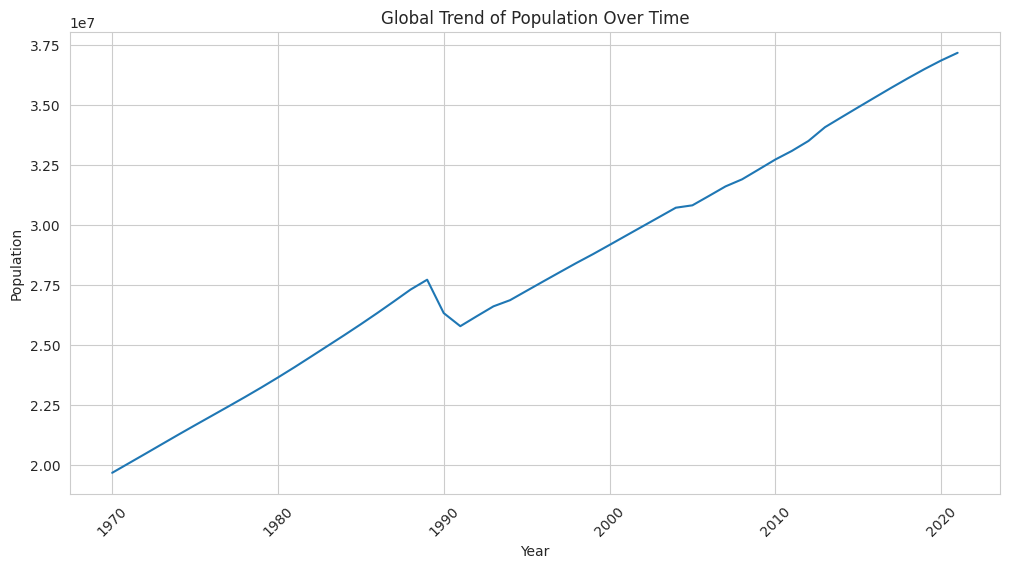

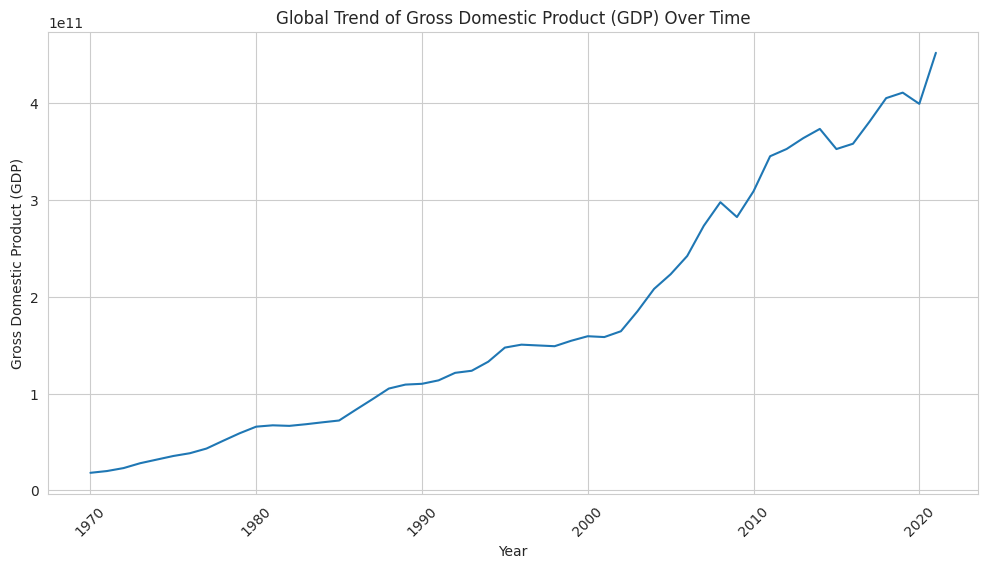

In [10]:
# Grouping the data by Year and calculating the mean for each numerical column
global_trends = imputed_data.groupby('Year').mean().reset_index()

# Plotting trends over time for Population and GDP
columns_to_plot = ['Population', 'Gross Domestic Product (GDP)']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=global_trends, x='Year', y=column)
    plt.title(f'Global Trend of {column} Over Time')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


The line graphs above show the global trends over time for Population and Gross Domestic Product (GDP):

Population: The global average population of countries has been steadily increasing over the years.
Gross Domestic Product (GDP): The global average GDP has also been increasing, reflecting economic growth.


Correlation Between Economic Indicators
Next, let’s visualize the correlation between different economic indicators to understand how they relate to each other. A heatmap can be helpful in this case

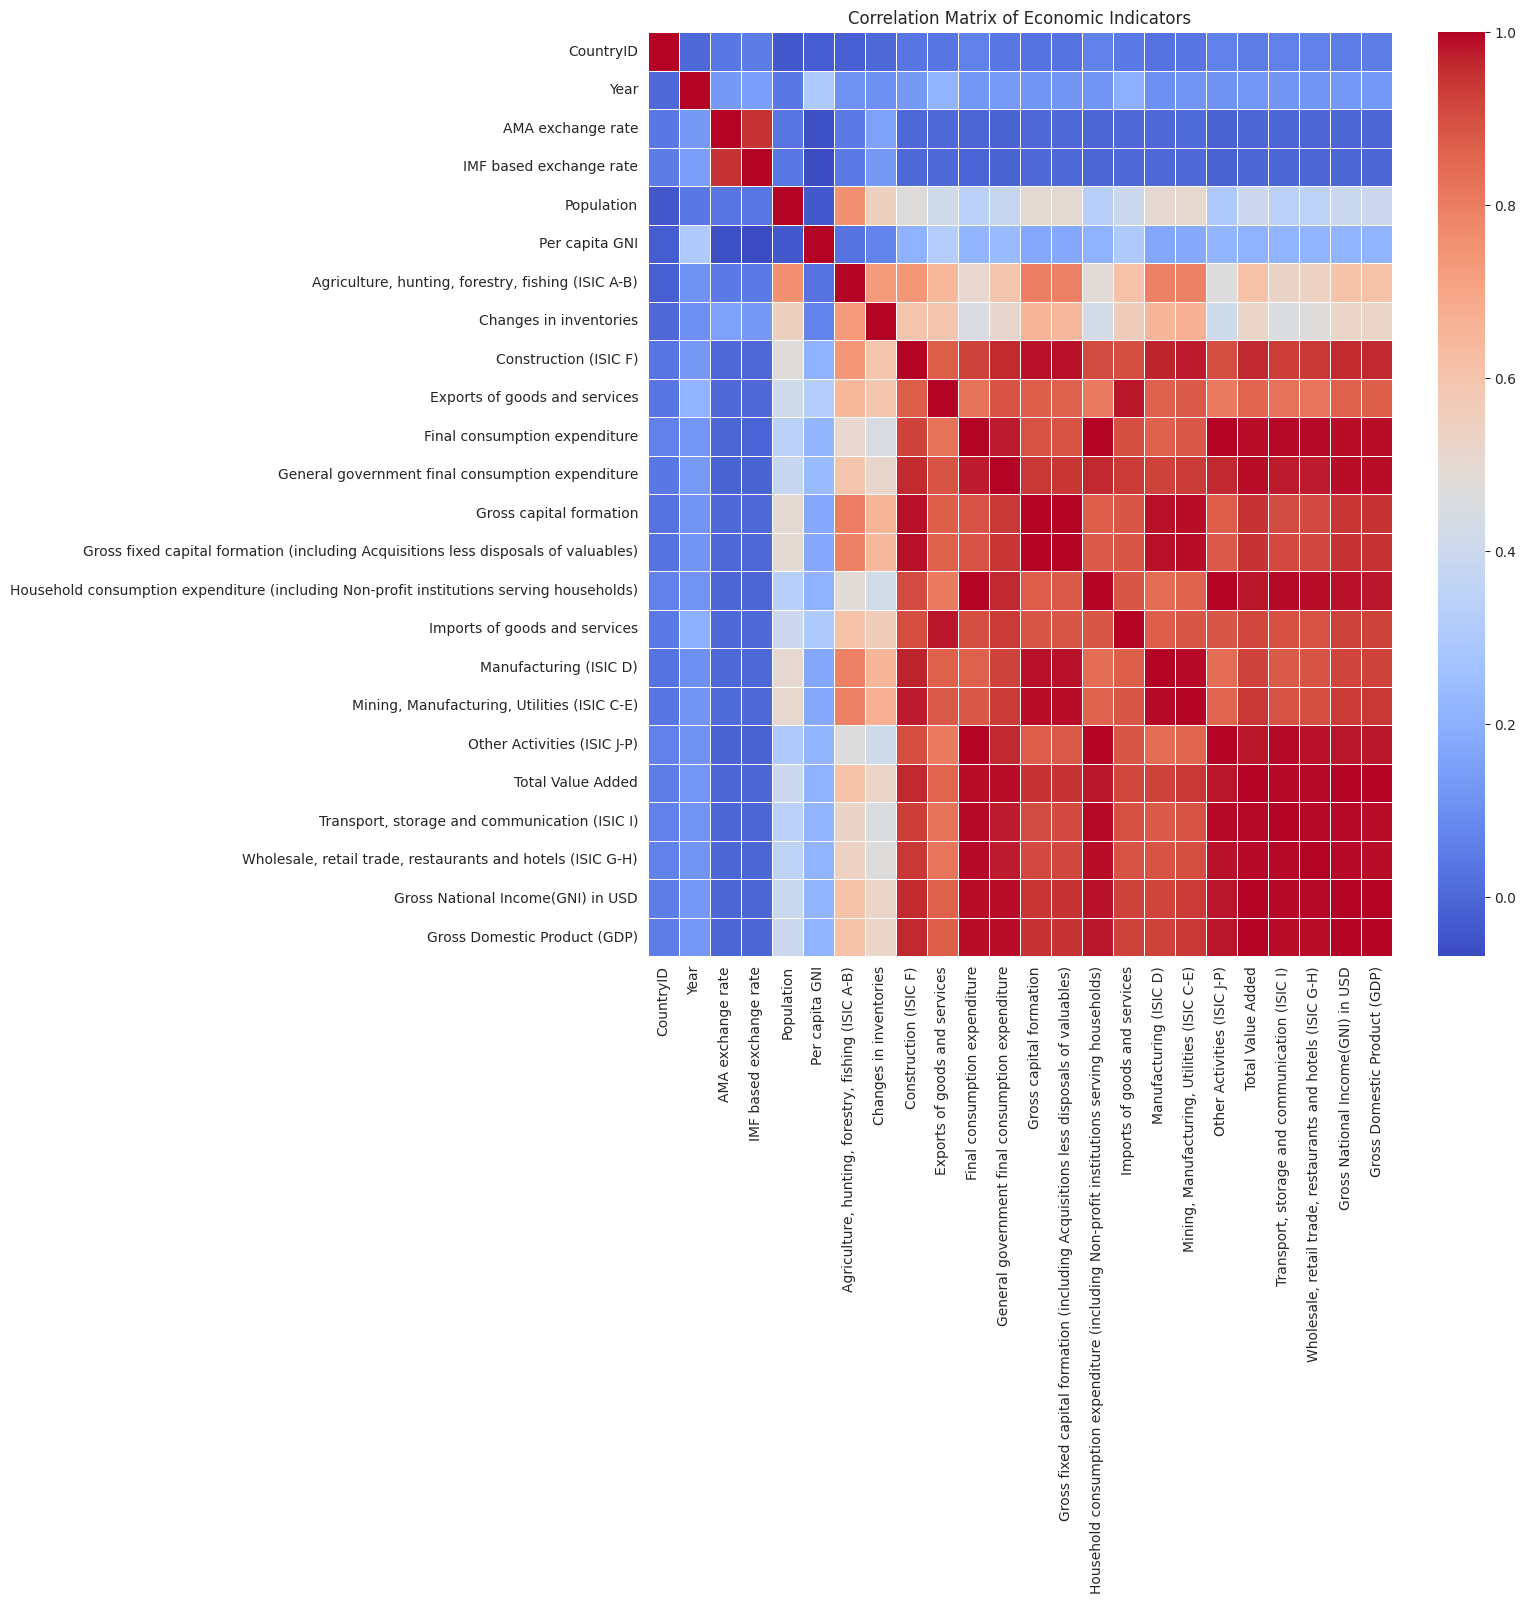

In [11]:
# Calculating the correlation matrix
correlation_matrix = imputed_data.select_dtypes(include=['float64', 'int64']).corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


The heatmap above visualizes the correlation between different economic indicators in the dataset. In the heatmap:

A correlation value close to 1 indicates a strong positive correlation.
A correlation value close to −1 indicates a strong negative correlation.
A correlation value around
0 indicates no correlation.
From the heatmap, we can observe that many economic indicators are positively correlated with each other, which is expected as growth in one sector often leads to growth in others.



Data Preprocessing:
Scaling: Numeric features will be scaled so that each feature contributes equally to the distance calculations in algorithms.
Encoding Categorical Variables: Categorical variables like Country and Currency will be encoded to convert them into a format that could be provided to ML algorithms.
Feature Selection:
Correlation Analysis: Remove highly correlated features to reduce multicollinearity.
Feature Importance: We could use models like Random Forest to estimate the importance of different features and select the most important ones.

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initializing the StandardScaler and LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

# Making a copy of the data to apply preprocessing
preprocessed_data = imputed_data.copy()

# Scaling numerical columns
numerical_columns = preprocessed_data.select_dtypes(include=['float64', 'int64']).columns
preprocessed_data[numerical_columns] = scaler.fit_transform(preprocessed_data[numerical_columns])

# Encoding categorical columns
categorical_columns = preprocessed_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    preprocessed_data[column] = encoder.fit_transform(preprocessed_data[column])

# Displaying the preprocessed data
preprocessed_data.head()


,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),Country,Currency
0,-1.700595,-1.762642,-0.155979,-0.176097,-0.155640,-0.515634,-0.170383,-0.168798,-0.200090,-0.267718,...,-0.179094,-0.194824,-0.154157,-0.177258,-0.168172,-0.178311,-0.181820,-0.183987,0,0
1,-1.700595,-1.695526,-0.155979,-0.176097,-0.153336,-0.515400,-0.169363,-0.167586,-0.200046,-0.267558,...,-0.178993,-0.194740,-0.154144,-0.177174,-0.168129,-0.178234,-0.181736,-0.183904,0,0
2,-1.700595,-1.628410,-0.155979,-0.176097,-0.150963,-0.516513,-0.171429,-0.169766,-0.200135,-0.267363,...,-0.179197,-0.194910,-0.154170,-0.177344,-0.168216,-0.178389,-0.181903,-0.184072,0,0
3,-1.700595,-1.561295,-0.155979,-0.176097,-0.148434,-0.516454,-0.170742,-0.168798,-0.200105,-0.267367,...,-0.179129,-0.194854,-0.154161,-0.177287,-0.168187,-0.178338,-0.181847,-0.184016,0,0
4,-1.700595,-1.494179,-0.155979,-0.176097,-0.145853,-0.514873,-0.166245,-0.166205,-0.199911,-0.267035,...,-0.178684,-0.194484,-0.154107,-0.176919,-0.167997,-0.178000,-0.181478,-0.183652,0,0


The data preprocessing steps have been successfully applied:

Numerical features have been scaled using the Standard Scaler, which standardizes features by removing the mean and scaling to unit variance.
Categorical variables such as Country and Currency have been encoded to numerical values, allowing them to be used in machine learning algorithms.


In [13]:
import numpy as np

# Setting a threshold for high correlation
correlation_threshold = 0.9

# Creating a correlation matrix
corr_matrix = preprocessed_data.corr().abs()

# Getting the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Finding the columns to drop based on the correlation threshold
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Dropping the highly correlated columns
reduced_data = preprocessed_data.drop(columns=columns_to_drop)

# Displaying the columns that were dropped
columns_to_drop


<ipython-input-13-1fc9f9bad303>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['IMF based exchange rate',
 'Final consumption expenditure',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
 'Household consumption expenditure (including Non-profit institutions serving households)',
 'Imports of goods and services',
 'Manufacturing (ISIC D)',
 'Mining, Manufacturing, Utilities (ISIC C-E)',
 'Other Activities (ISIC J-P)',
 'Total Value Added',
 'Transport, storage and communication (ISIC I)',
 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
 'Gross National Income(GNI) in USD',
 'Gross Domestic Product (GDP)']

The following columns have been dropped due to high correlation (
>
0.9
>0.9) with other features in the dataset:

IMF based exchange rate
Final consumption expenditure
General government final consumption expenditure
Gross capital formation
Gross fixed capital formation (including Acquisitions less disposals of valuables)
Household consumption expenditure (including Non-profit institutions serving households)
Imports of goods and services
Manufacturing (ISIC D)
Mining, Manufacturing, Utilities (ISIC C-E)
Other Activities (ISIC J-P)
Total Value Added
Transport, storage and communication (ISIC I)
Wholesale, retail trade, restaurants and hotels (ISIC G-H)
Gross National Income(GNI) in USD
Gross Domestic Product (GDP)
By removing these highly correlated features, we've reduced multicollinearity in the dataset, which should improve model interpretability and performance.

In [18]:
# Checking the exact column names in the dataset to avoid referencing errors
column_names = reduced_data.columns
column_names


Index(['CountryID', 'Year', 'AMA exchange rate', 'Population',
       'Per capita GNI', 'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Country', 'Currency'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

# Defining the target variable and features
X = reduced_data.drop(columns=['Per capita GNI'])
y = reduced_data['Per capita GNI']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8409, 10), (2103, 10), (8409,), (2103,))

Let's start by building a Linear Regression model, followed by a Random Forest Regressor. We will then evaluate each model based on the Mean Absolute Error (MAE) and the R-squared value to understand their performance.

1. Linear Regression
I'll build and evaluate a Linear Regression model first. Let's do this.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initializing the Linear Regression model
lr_model = LinearRegression()

# Fitting the model with the training data
lr_model.fit(X_train, y_train)

# Making predictions on the testing data
lr_predictions = lr_model.predict(X_test)

# Calculating the Mean Absolute Error and R2 score
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mae, lr_r2


(0.46823498270401154, 0.23030761670720878)

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model with the training data
rf_model.fit(X_train, y_train)

# Making predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Calculating the Mean Absolute Error and R2 score
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

rf_mae, rf_r2


(0.04330231760811644, 0.9871455700381407)

After building and evaluating the Random Forest model, the next logical step is to interpret the model and use it for predictions. We can also explore the feature importances provided by the model to understand which features are most influential in predicting the Per capita GNI.

1. Feature Importance
Let's start by exploring the features deemed most important by the Random Forest model. This will give us insights into which variables are most influential in predicting the Per capita GNI

In [23]:
# Getting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to hold the features and their corresponding importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the features and their importances
features_df


,Feature,Importance
6,Construction (ISIC F),0.327239
3,Population,0.287433
7,Exports of goods and services,0.273902
9,Currency,0.026622
1,Year,0.023709
2,AMA exchange rate,0.022558
4,"Agriculture, hunting, forestry, fishing (ISIC ...",0.013972
5,Changes in inventories,0.012231
8,Country,0.007299
0,CountryID,0.005036


In [24]:
# Making predictions on the test set
rf_test_predictions = rf_model.predict(X_test)

# Creating a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_test_predictions
})

# Resetting index for better visualization
comparison_df.reset_index(drop=True, inplace=True)

# Displaying the comparison of actual and predicted values
comparison_df.head()


,Actual,Predicted
0,-0.338006,-0.361119
1,2.104904,1.948465
2,-0.512998,-0.501701
3,-0.226462,-0.209620
4,-0.518505,-0.518332
